In [80]:
import pandas
from matplotlib import pyplot as plt
import numpy as np

In [81]:
data = pandas.read_csv("prb72-data.csv", sep=" ", header=None).to_numpy()
centroizi = pandas.read_csv("prb72-centroizi.csv", sep=" ", header=None).to_numpy()

In [82]:
data, centroizi

(array([[0.25, 0.5 ],
        [0.5 , 0.35],
        [0.75, 0.5 ],
        [1.  , 0.35],
        [1.4 , 0.7 ],
        [0.5 , 0.85],
        [0.25, 1.  ],
        [0.75, 1.  ],
        [0.35, 1.25],
        [0.85, 1.25],
        [3.25, 0.5 ],
        [3.5 , 0.35],
        [3.  , 1.  ],
        [3.25, 0.85],
        [3.45, 0.85],
        [3.75, 0.85],
        [3.25, 1.1 ],
        [3.  , 3.25],
        [3.25, 3.  ],
        [3.1 , 3.5 ],
        [1.  , 2.5 ],
        [1.2 , 2.4 ],
        [1.25, 2.5 ],
        [1.5 , 2.5 ],
        [0.65, 2.75],
        [1.2 , 2.75],
        [1.37, 2.75],
        [1.  , 3.  ],
        [1.1 , 3.2 ],
        [0.85, 3.35]]),
 array([[0.3 , 1.75],
        [0.3 , 2.  ],
        [0.3 , 2.25]]))

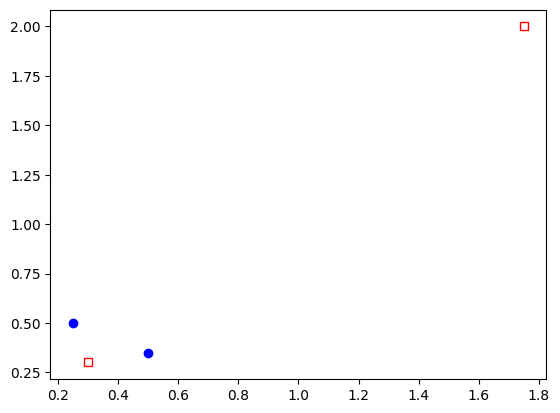

In [83]:
plt.plot(data[0], data[1], "bo")
plt.plot(
    centroizi[0],
    centroizi[1],
    "s",
    label="Centroizi",
    markerfacecolor="none",
    markeredgecolor="red",
)
plt.show()

Iteration 0


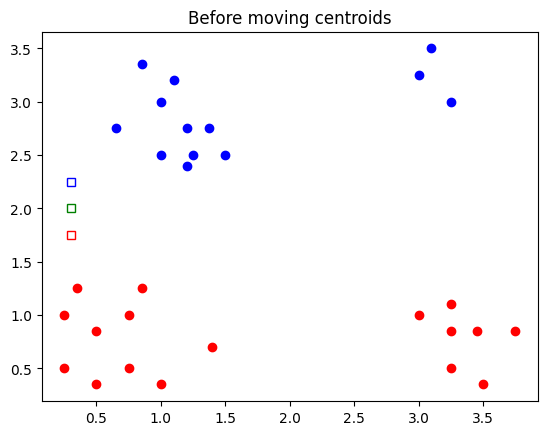

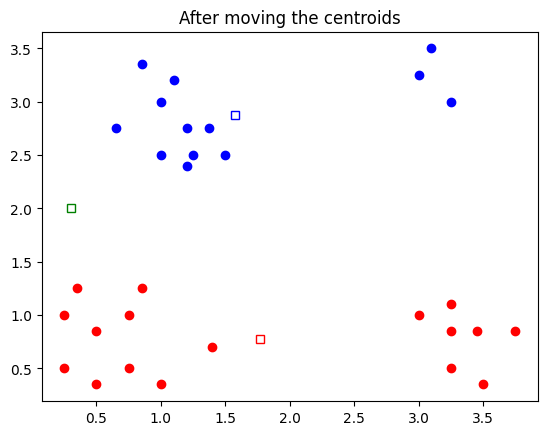

Iteration 1


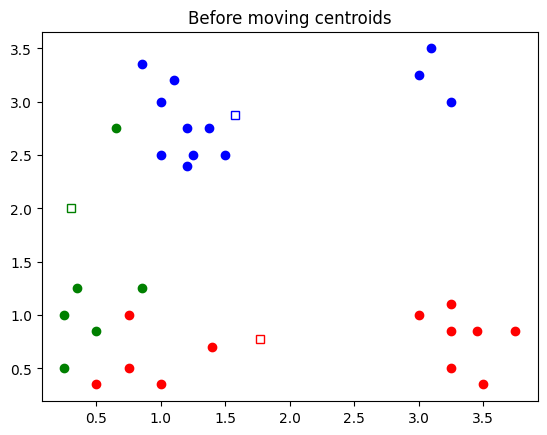

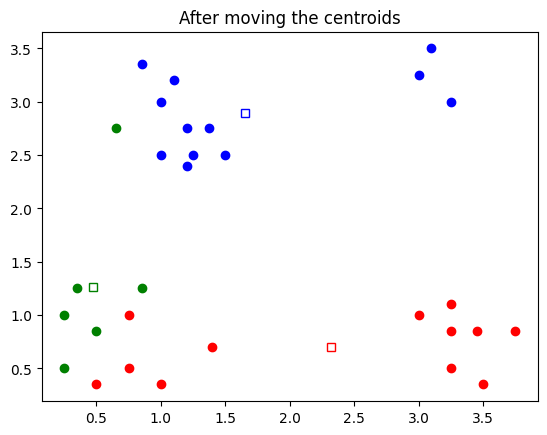

Iteration 2


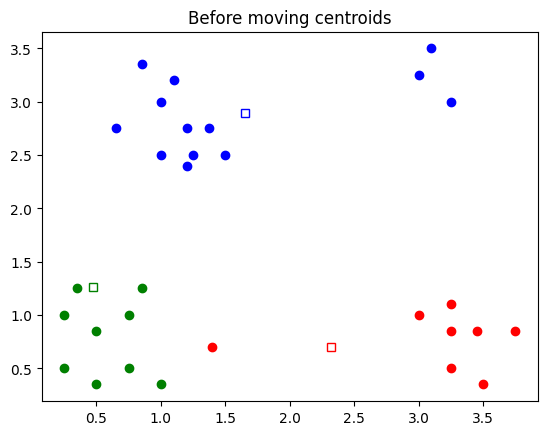

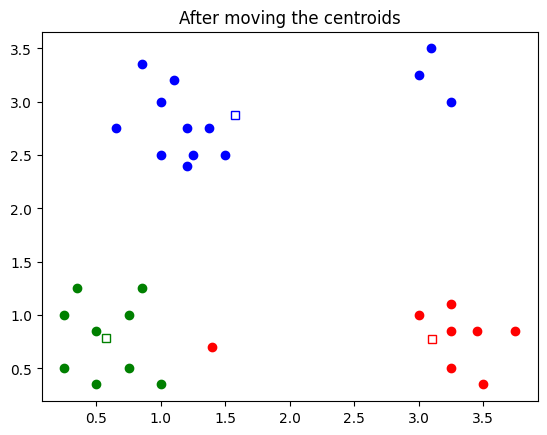

Iteration 3


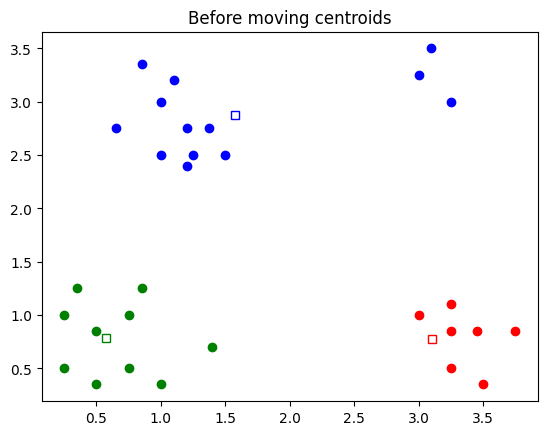

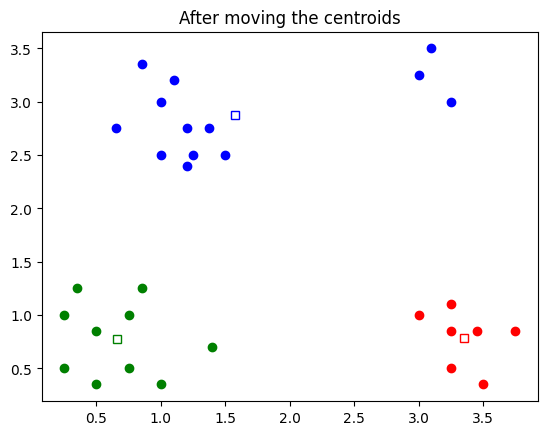

Iteration 4


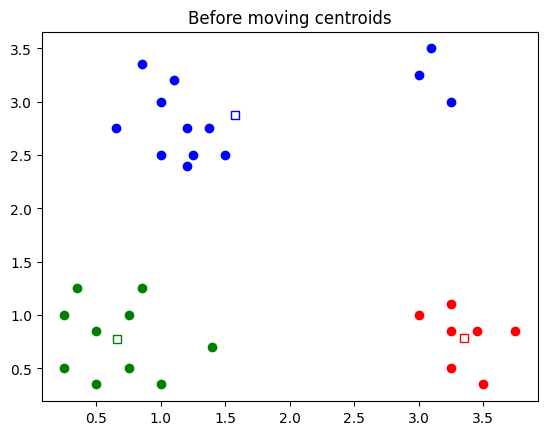

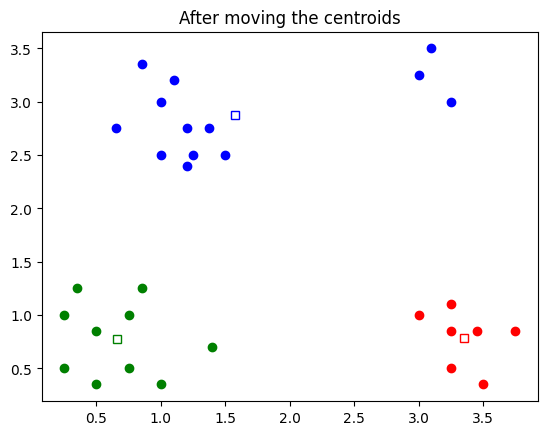

In [192]:
class KMeans:
    point_colors = ["ro", "go", "bo"]
    centroid_colors = ["red", "green", "blue"]
    ellpisis_colors = ["r", "g", "b"]

    def __init__(self, centroids: np.ndarray, data: np.ndarray):
        self.centroids = centroids
        self.data = data

    @staticmethod
    def distance(x1, y1, x2, y2):
        return np.sqrt((x1-x2)**2 + (y1-y2)**2)

    def predict(self):
        distances = np.empty((len(self.data), len(self.centroids)))
        for di, data in enumerate(self.data):
            for ci, centroid in enumerate(self.centroids):
                distances[di][ci] = self.distance(data[0], data[1], centroid[0], centroid[1])
        prediction = np.argmin(distances, axis=1)
        organized = [[] for _ in range(len(self.centroids))]
        for di, data in enumerate(self.data):
            organized[prediction[di]].append(data)
        for i in range(len(organized)):
            organized[i] = np.array(organized[i])
        return organized

    def plot_prediction(self, prediction, centroids, title=None):
        for i, cluster in enumerate(prediction):
            if len(cluster):
                plt.plot(cluster[:,0], cluster[:,1], self.point_colors[i])
            plt.plot(
                centroids[i][0],
                centroids[i][1],
                "s",
                markerfacecolor="none",
                markeredgecolor=self.centroid_colors[i],
            )
        plt.title(title)
        plt.show()

    def get_max_distance(self, point, cluster):
        distances = np.empty(len(cluster))
        for di, data in enumerate(cluster):
            distances[di] = self.distance(
                data[0], data[1], point[0], point[1]
            )
        return np.max(distances)

    @staticmethod
    def get_center(points):
        return np.sum(points, axis=0) / len(points)

    def fit(self):
        prediction = self.predict()
        new_centroids = np.empty_like(self.centroids)
        for i, cluster in enumerate(prediction):
            if len(cluster):
                new_centroids[i] = np.sum(cluster, axis=0) / len(cluster)
            else:
                new_centroids[i] = self.centroids[i]
        return new_centroids

km = KMeans(centroizi, data)

for i in range(10):
    print(f"Iteration {i}")
    prediction, centroids = km.predict(), km.centroids
    km.plot_prediction(prediction, centroids, "Before moving centroids")
    new_centroids = km.fit()
    km.plot_prediction(prediction, new_centroids, "After moving the centroids")
    if np.array_equal(km.centroids, new_centroids):
        break
    km.centroids = new_centroids